<h1 align="center"> Part 1: Getting Time Series Data and Basic Plotting</h1>

<h3 align='Left'> Importing Libraries</h3>

In [37]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

<h3 align='Left'> Getting Data and Viewing with Pandas </h3>

In [38]:
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
google = web.DataReader('GOOG', data_source = 'google', start = '3/14/2009', end = '4/14/2016')
google = google.drop('Volume', axis = 1 )
google.head()

,Open,High,Low,Close
Date,,,,
2009-03-16,162.83,164.70,159.14,159.69
2009-03-17,159.93,167.50,159.39,167.50
2009-03-18,167.24,169.83,163.86,166.38
2009-03-19,165.67,167.83,163.53,164.81
2009-03-20,164.98,166.33,163.01,164.91


<h3 align='Left'> Adding Column </h3>

In [39]:
google['Ticks'] = range(0,len(google.index.values))

In [40]:
google.head()

,Open,High,Low,Close,Ticks
Date,,,,,
2009-03-16,162.83,164.70,159.14,159.69,0
2009-03-17,159.93,167.50,159.39,167.50,1
2009-03-18,167.24,169.83,163.86,166.38,2
2009-03-19,165.67,167.83,163.53,164.81,3
2009-03-20,164.98,166.33,163.01,164.91,4


<h3 align='Left'> Plotting Ticks vs Open Price</h3>

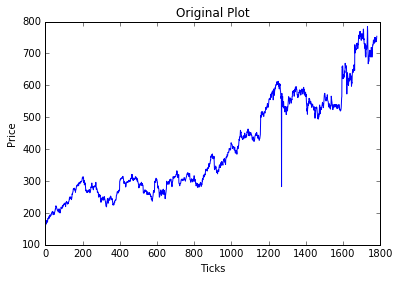

In [47]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'Open', data = google);

<h3 align='Left'> Sampling 1/10th of the Data</h3>

In [42]:
one_tenth = google.sample(frac = .1, random_state=np.random.randint(10))

In [43]:
one_tenth.head()

,Open,High,Low,Close,Ticks
Date,,,,,
2009-06-08,219.53,220.24,216.84,219.17,58
2010-04-28,265.78,267.15,260.25,264.33,281
2015-04-02,540.85,540.85,533.85,535.53,1522
2010-12-30,298.70,300.37,298.40,299.13,452
2015-12-17,762.42,762.68,749.00,749.43,1702


<h3 align='Left'>Reordering Data by Ticks Value</h3>

In [44]:
# removing index name
one_tenth.index.name = None
one_tenth = one_tenth.sort_values(by=['Ticks'], ascending=[True])
one_tenth.head()

,Open,High,Low,Close,Ticks
2009-03-20,164.98,166.33,163.01,164.91,4
2009-05-07,201.85,202.29,196.05,198.11,37
2009-06-08,219.53,220.24,216.84,219.17,58
2009-06-25,203.30,207.74,203.05,207.68,71
2009-07-30,221.08,225.51,221.08,222.60,95


<h3 align='Left'> Plotting Ticks vs Open Price on Sampled Data</h3>

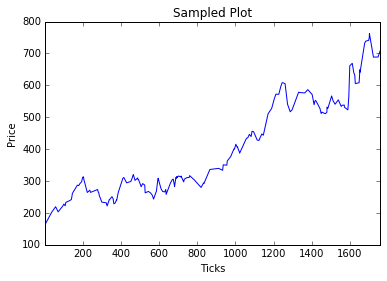

In [51]:
axes = one_tenth.plot('Ticks', 'Open', legend = False, title = 'Sampled Plot');
axes.legend = None;
axes.set_ylabel('Price');

<h3 align='Left'> Plotting Original Data vs Sampled Data (Subplot)</h3>

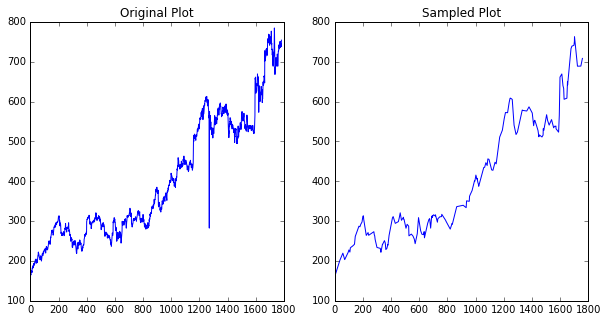

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('Ticks', 'Open', data = google);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled Plot');